In [1]:
# AUTISM PREDICTION
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
print("Training Data Size :",train.shape[0])
print("Testing Data Size :",test.shape[0])

Training Data Size : 800
Testing Data Size : 200


In [5]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [6]:
train.isna().count() # no missing values

ID                 800
A1_Score           800
A2_Score           800
A3_Score           800
A4_Score           800
A5_Score           800
A6_Score           800
A7_Score           800
A8_Score           800
A9_Score           800
A10_Score          800
age                800
gender             800
ethnicity          800
jaundice           800
austim             800
contry_of_res      800
used_app_before    800
result             800
age_desc           800
relation           800
Class/ASD          800
dtype: int64

In [7]:
train.shape

(800, 22)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
train = train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [10]:
# converting categorical to numerical

cat_col = train[['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'relation']]
enc = OneHotEncoder(handle_unknown='ignore')
cat = enc.fit_transform(cat_col) #sparse matrix
x = pd.DataFrame.sparse.from_spmatrix(cat, columns=enc.get_feature_names_out()) # sparse matrix to dataframe
X_num = train[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']]
X = pd.concat([X_num, x], axis=1) # training data without categorical values
y = train['Class/ASD']

In [11]:
irrelevant_columns = ['age_desc', 'used_app_before']
train = train.drop(columns=irrelevant_columns)

In [12]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print("X_train Training Data Size :",X_train.shape[0])
print("X_test Testing Data Size :",X_test.shape[0])

X_train Training Data Size : 640
X_test Testing Data Size : 160


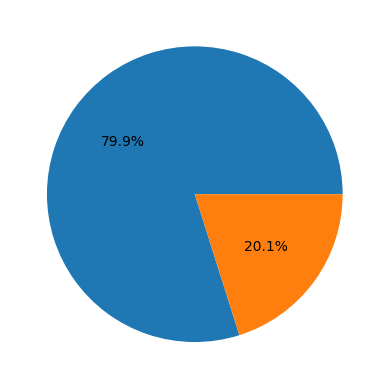

In [13]:
# EDA
plt.pie(train['Class/ASD'].value_counts().values, autopct='%1.1f%%') #1-orange-yes
plt.show()


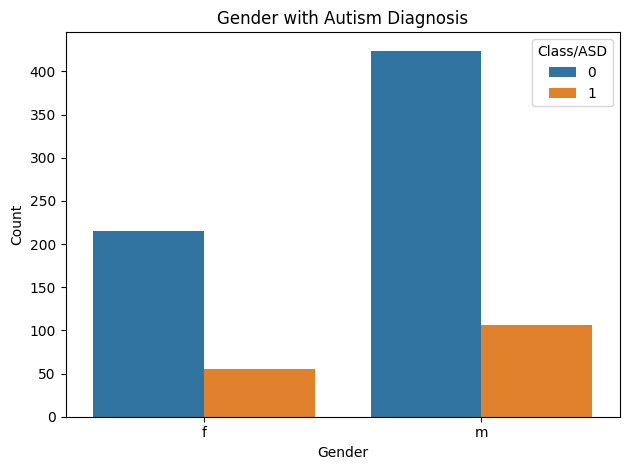

In [14]:
sns.countplot(data=train, x='gender', hue='Class/ASD')
plt.title('Gender with Autism Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
# countplotr

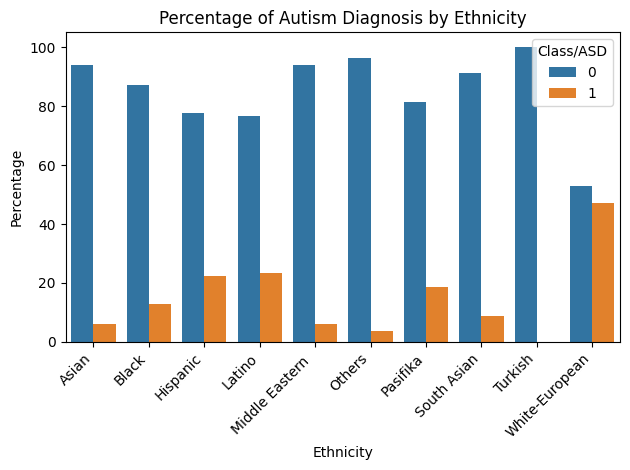

In [15]:
total_per_ethnicity = train.groupby('ethnicity')['Class/ASD'].count()
percentage_per_ethnicity = (train.groupby(['ethnicity', 'Class/ASD']).size() / total_per_ethnicity * 100).reset_index(name='Percentage')

sns.barplot(data=percentage_per_ethnicity, x='ethnicity', y='Percentage', hue='Class/ASD')

plt.xticks(rotation=45, ha='right')

plt.title('Percentage of Autism Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

In [16]:
# 1. logistic regression
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(random_state=42)

log_reg_classifier.fit(X_train, y_train)

y_pred = log_reg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression classifier:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Logistic Regression classifier: 0.84375
Precision: 0.6
Recall: 0.65625
F1-score: 0.6268656716417911


In [17]:
# cross-validation on logistic regression
cv_scores_lr = cross_val_score(log_reg_classifier, X_train, y_train, cv=10)
mean_cv_score_lr = np.mean(cv_scores_lr)
print("Mean Cross-Validation Score:", mean_cv_score_lr)

Mean Cross-Validation Score: 0.8546875


In [18]:
# 2. SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_sv = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sv)
print("Accuracy of SVM classifier:", accuracy)

precision = precision_score(y_test, y_pred_sv)
recall = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of SVM classifier: 0.84375
Precision: 0.5945945945945946
Recall: 0.6875
F1-score: 0.6376811594202898


In [19]:
# cross validation on svm
cv_scores_sv= cross_val_score(svm_classifier, X_train, y_train, cv=10)
mean_cv_score_sv = np.mean(cv_scores_sv)
print("Mean Cross-Validation Score:", mean_cv_score_sv)

Mean Cross-Validation Score: 0.8453125


In [20]:
# 3. decision tree
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree classifier:", accuracy_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Decision Tree classifier: 0.775
Precision: 0.4444444444444444
Recall: 0.5
F1-score: 0.47058823529411764


In [21]:
#  cross-validation on decision tree
cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=10)
mean_cv_score_dt = np.mean(cv_scores_dt)
print("Mean Cross-Validation Score (Decision Tree):", mean_cv_score_dt)

Mean Cross-Validation Score (Decision Tree): 0.821875


In [22]:
# 4. random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuray of Model is :",accuracy_score(y_test,predict))

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuray of Model is : 0.8375
Precision: 0.5882352941176471
Recall: 0.625
F1-score: 0.6060606060606061


In [23]:
#cross validation Random forest

cv_scores_rf = cross_val_score(clf, X_train, y_train, cv=10)
mean_cv_score_rf = np.mean(cv_scores_rf)
print("Mean Cross-Validation Score ", mean_cv_score_rf)

Mean Cross-Validation Score  0.859375


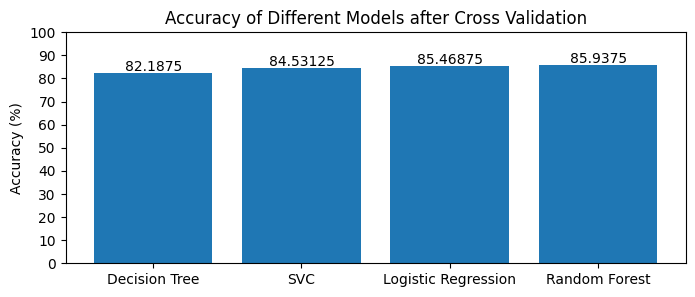

In [24]:
# model comparisons after cross validation

dt_classifier = mean_cv_score_dt*100
svc = mean_cv_score_sv*100
lr = mean_cv_score_lr*100
rf_classifier = mean_cv_score_rf*100

accuracies = [dt_classifier, svc, lr, rf_classifier]
labels = ['Decision Tree', 'SVC', 'Logistic Regression', 'Random Forest']

# Plot barplot
plt.figure(figsize=(8,3))
plt.bar(labels, accuracies)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models after Cross Validation')
plt.ylim(0, 100)  # Adjust ylim if needed

# Set custom y-axis ticks
plt.yticks(range(0, 101, 10))

for i in range(len(labels)):
    plt.text(i, accuracies[i] + 1, f"{accuracies[i]}", ha='center')

plt.show()

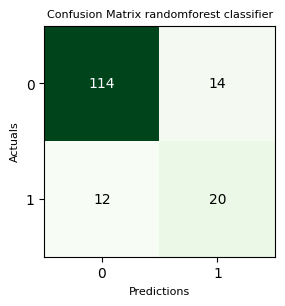

In [25]:
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predict), figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix randomforest classifier', fontsize=8)
plt.show()

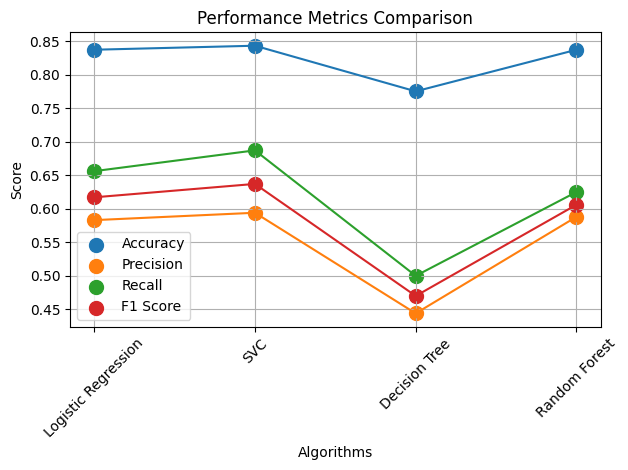

In [26]:
import matplotlib.pyplot as plt

# Example performance metrics (replace with actual values)
algorithms = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
accuracy = [0.837, 0.843, 0.775, 0.837]
precision = [0.583, 0.594, 0.444, 0.588]
recall = [0.656 ,0.687, 0.5, 0.625]
f1 = [0.617, 0.637, 0.470, 0.606]

# Set the size of the markers
marker_size = 100

# Create scatter line plot for accuracy
plt.scatter(algorithms, accuracy, s=marker_size, label='Accuracy')
plt.plot(algorithms, accuracy, linestyle='-', marker='o')

# Create scatter line plot for precision
plt.scatter(algorithms, precision, s=marker_size, label='Precision')
plt.plot(algorithms, precision, linestyle='-', marker='o')

# Create scatter line plot for recall
plt.scatter(algorithms, recall, s=marker_size, label='Recall')
plt.plot(algorithms, recall, linestyle='-', marker='o')

# Create scatter line plot for F1 score
plt.scatter(algorithms, f1, s=marker_size, label='F1 Score')
plt.plot(algorithms, f1, linestyle='-', marker='o')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Preprocess the features in the test dataset and loading the testdata

In [27]:
irrelevant_columns = ['age_desc', 'used_app_before']
test = test.drop(columns=irrelevant_columns)
test = test.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

In [28]:
X_test_num = test[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']]
cat_col_test = test[['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'relation']]
cat_test = enc.transform(cat_col_test)
x_test = pd.DataFrame.sparse.from_spmatrix(cat_test, columns=enc.get_feature_names_out())
X_test_final = pd.concat([X_test_num, x_test], axis=1)


In [29]:
predictions = clf.predict(X_test_final)
df = pd.DataFrame({"ID": test['ID'], 'Class/ASD': predictions})
df.head()


,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


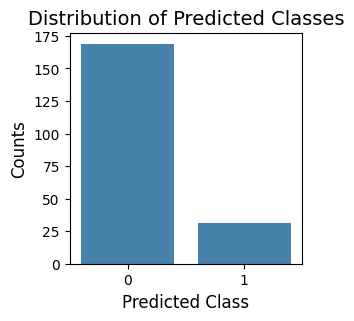

In [30]:
# distribution of testdata
class_counts = df['Class/ASD'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(3, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.9)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of Predicted Classes', fontsize=14)
plt.show()